### Part 3 will look to answering the following questions: 
 
 Q5. Electricity production from renewable sources over time in the US. 
 
 Q6. Effect of US electricity production from renewable sources on the US dollar (index). 
 

In [42]:
import os 
import csv 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import datetime as dt

In [43]:
#pulling in transformed files 

#renewable production vs. oil production over time 
renewable_oil_filepath = "Transformed Data\Question 5.csv"
renewable_oil = pd.read_csv(renewable_oil_filepath)

#types of renewable sources 
renewable_data_filepath = "Transformed Data\Question 5B.csv"
renewable_data = pd.read_csv(renewable_data_filepath)

#types of oil sources
oil_data_filepath = "Transformed Data\Question 5C.csv"
oil_data = pd.read_csv(oil_data_filepath)

#USD versus renewable 
USD_renewables_filepath = "Transformed Data\Question 6.csv"
USD_renewables = pd.read_csv(USD_renewables_filepath)

renewable_oil.head()

,Date,Total Oil (mil kWh),Total Renewable (mil kWh)
0,2005-01-01,265940.068,7003.804
1,2005-02-01,230727.966,6221.280
2,2005-03-01,248012.128,7368.681
3,2005-04-01,226231.496,7200.990
4,2005-05-01,243967.698,7543.740


## Q5. Electricity production from renewable sources over time in the US.

analyzing electricity production over 2005 to 2019, looking at the contribution of the different sources. 

### Looking at electricity production from renewable sources

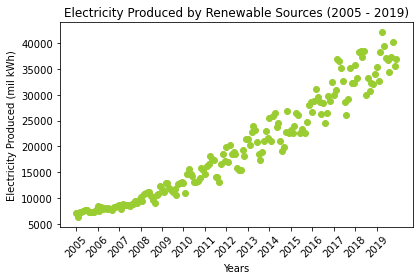

In [44]:
# major ticks for x-axis (by year)
years = np.arange(2005, 2020, 1)
ticks = np.arange(0, len(renewable_data["Date"]), 12)

plt.scatter(renewable_data["Date"], renewable_data["Total Renewable (mil kWh)"], color="yellowgreen")
plt.ylabel("Electricity Produced (mil kWh)")
plt.xlabel("Years")
plt.xticks(ticks, years, rotation=45)
plt.title("Electricity Produced by Renewable Sources (2005 - 2019)")
plt.tight_layout()

plt.savefig("Plots\Question 5 - Time vs. Renewable.png")


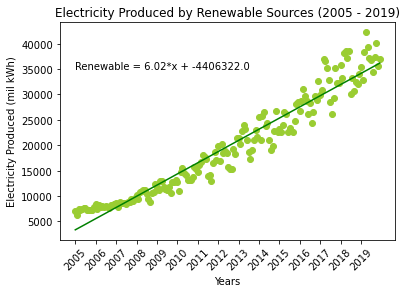

In [70]:
# regression analysis
renewable_oil["Date_ordinal"] = pd.to_datetime(renewable_oil["Date"]).apply(lambda date: date.toordinal())

r_slope, r_intercept, r_rvalue, r_pvalue, r_stderr = stats.linregress(renewable_oil["Date_ordinal"], renewable_oil["Total Renewable (mil kWh)"])
regressed_renewable = renewable_oil["Date_ordinal"] * r_slope + r_intercept 

plt.annotate(f"Renewable = {round(r_slope,2)}*x + {round(r_intercept,0)}", (0,35000))
plt.scatter(renewable_data["Date"], renewable_data["Total Renewable (mil kWh)"], color="yellowgreen")
plt.plot(renewable_data["Date"], regressed_renewable, color="green")
plt.ylabel("Electricity Produced (mil kWh)")
plt.xlabel("Years")
plt.xticks(ticks, years, rotation=45)
plt.title("Electricity Produced by Renewable Sources (2005 - 2019)")


plt.savefig("Plots\Question 5 - Time vs. Renewable (with Regression).png")


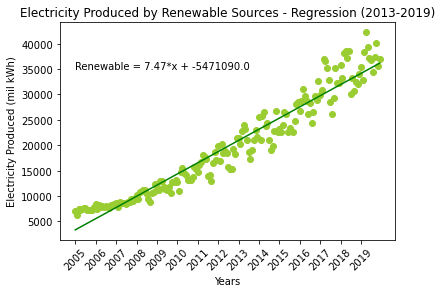

In [84]:
# regression analysis accounting from 2013 to 2019
renewable_oil["Date_ordinal"] = pd.to_datetime(renewable_oil["Date"]).apply(lambda date: date.toordinal())

r2_slope, r2_intercept, r2_rvalue, r2_pvalue, r2_stderr = stats.linregress(renewable_oil["Date_ordinal"][-84:], renewable_oil["Total Renewable (mil kWh)"][-84:])
regressed_renewable = renewable_oil["Date_ordinal"] * r_slope + r_intercept 

plt.scatter(renewable_data["Date"], renewable_data["Total Renewable (mil kWh)"], color="yellowgreen")
plt.plot(renewable_data["Date"], regressed_renewable, color="green")

plt.annotate(f"Renewable = {round(r2_slope,2)}*x + {round(r2_intercept,0)}", (0,35000))
plt.ylabel("Electricity Produced (mil kWh)")
plt.xlabel("Years")
plt.xticks(ticks, years, rotation=45)
plt.title("Electricity Produced by Renewable Sources - Regression (2013-2019)")


plt.savefig("Plots\Question 5 - Time vs. Renewable (with Regression - 2013 to 2019).png")

### Comparing oil production and renewable source production of electricity

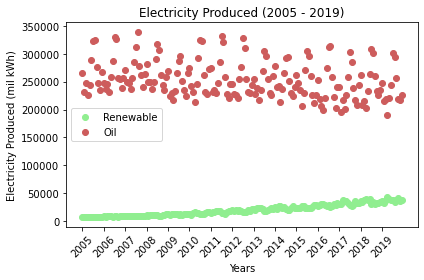

In [85]:
# major ticks for x-axis (by year)
years = np.arange(2005, 2020, 1)
ticks = np.arange(0, len(renewable_oil["Date"]), 12)

fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(renewable_oil["Date"], renewable_oil["Total Renewable (mil kWh)"], c="lightgreen", label="Renewable")
ax1.scatter(renewable_oil["Date"], renewable_oil["Total Oil (mil kWh)"], c="indianred", label="Oil")
plt.legend(loc="best")
plt.ylabel("Electricity Produced (mil kWh)")
plt.xlabel("Years")
plt.xticks(ticks, years, rotation=45)
plt.title("Electricity Produced (2005 - 2019)")
plt.tight_layout()

plt.savefig("Plots\Question 5 - time vs. Oil and Renewable.png")



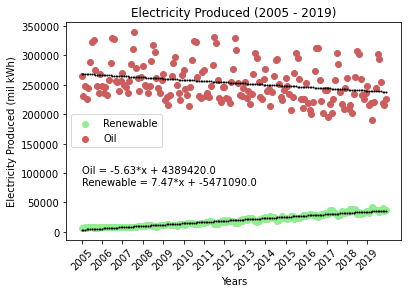

In [89]:
#Regression Analysis 

o_slope, o_intercept, o_rvalue, o_pvalue, o_stderr = stats.linregress(renewable_oil["Date_ordinal"], renewable_oil["Total Oil (mil kWh)"])
regressed_oil = renewable_oil["Date_ordinal"] * o_slope + o_intercept 

fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(renewable_oil["Date"], renewable_oil["Total Renewable (mil kWh)"], c="lightgreen", label="Renewable")
ax1.scatter(renewable_oil["Date"], renewable_oil["Total Oil (mil kWh)"], c="indianred", label="Oil")
ax1.scatter(renewable_oil["Date"], regressed_oil, c="black", s=1)
ax1.scatter(renewable_oil["Date"], regressed_renewable, c="black", s=1)

plt.annotate(f"Renewable = {round(r2_slope,2)}*x + {round(r2_intercept,0)}", (0,80000))
plt.annotate(f"Oil = {round(o_slope,2)}*x + {round(o_intercept,0)}", (0,100000))
plt.legend(loc="best")
plt.ylabel("Electricity Produced (mil kWh)")
plt.xlabel("Years")
plt.xticks(ticks, years, rotation=45)
plt.title("Electricity Produced (2005 - 2019)")

plt.savefig("Plots\Question 5 - Time vs. Oil and Renewable (with Regression).png")


In [88]:
#intercept of when renewable production = oil production 

#regressed_oil = renewable_oil["Date_ordinal"] * o_slope + o_intercept 
#regressed_renewable = renewable_oil["Date_ordinal"] * r_slope + r_intercept 

intercept = (o_intercept-r2_intercept)/(r2_slope-o_slope)

dt.date.fromordinal(int(intercept))

#If the trend from 2013 onwards is maintained, it is predicted that electricity from renewable sources will surpass oil sources. 

datetime.date(2061, 9, 19)

### Analysis on types of renewable sources

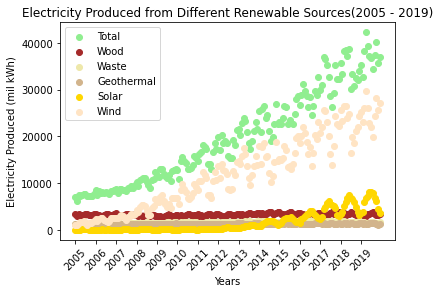

In [101]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(renewable_data["Date"], renewable_data["Total Renewable (mil kWh)"], c="lightgreen", label="Total")
ax1.scatter(renewable_data["Date"], renewable_data["Wood (mil kWh)"], c="brown", label="Wood")
ax1.scatter(renewable_data["Date"], renewable_data["Waste (mil kWh)"], c="palegoldenrod", label="Waste")
ax1.scatter(renewable_data["Date"], renewable_data["Geothermal (mil kWh)"], c="tan", label="Geothermal")
ax1.scatter(renewable_data["Date"], renewable_data["Solar (mil kWh)"], c="gold", label="Solar")
ax1.scatter(renewable_data["Date"], renewable_data["Wind (mil kWh)"], c="bisque", label="Wind")

plt.legend(loc="best")
plt.ylabel("Electricity Produced (mil kWh)")
plt.xlabel("Years")
plt.xticks(ticks, years, rotation=45)
plt.title("Electricity Produced from Different Renewable Sources(2005 - 2019)")

plt.savefig("Plots\Question 5 - Time vs. Types of Renewable Sources.png")

### Analysis on types of oil sources

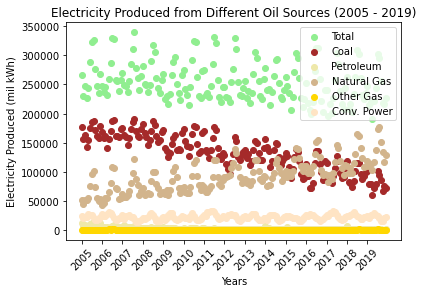

In [100]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(oil_data["Date"], oil_data["Total Oil (mil kWh)"], c="lightgreen", label="Total")
ax1.scatter(oil_data["Date"], oil_data["Coal (mil kWh)"], c="brown", label="Coal")
ax1.scatter(oil_data["Date"], oil_data["Petroleum (mil kWh)"], c="palegoldenrod", label="Petroleum")
ax1.scatter(oil_data["Date"], oil_data["Natural_Gas (mil kWh)"], c="tan", label="Natural Gas")
ax1.scatter(oil_data["Date"], oil_data["Other_Gas (mil kWh)"], c="gold", label="Other Gas")
ax1.scatter(oil_data["Date"], oil_data["Conventional Hydroelectric Power (mil kWh)"], c="bisque", label="Conv. Power")

plt.legend(loc="best")
plt.ylabel("Electricity Produced (mil kWh)")
plt.xlabel("Years")
plt.xticks(ticks, years, rotation=45)
plt.title("Electricity Produced from Different Oil Sources (2005 - 2019)")

plt.savefig("Plots\Question 5 - Time vs. Types of Oil Sources.png")

## Effect of US electricity production from renewable sources on the US dollar (index).

In [103]:
USD_renewables.head()

,Date,Wood (mil kWh),Waste (mil kWh),Geothermal (mil kWh),Solar (mil kWh),Wind (mil kWh),Total Renewable (mil kWh),USD Index
0,2005-01-01,3333.076,1278.347,1252.144,8.668,1131.569,7003.804,95.450
1,2005-02-01,3055.295,1123.407,1063.014,13.082,966.482,6221.280,95.698
2,2005-03-01,3287.717,1277.929,1204.252,38.157,1560.626,7368.681,95.307
3,2005-04-01,3035.547,1222.542,1187.134,58.263,1697.504,7200.990,96.234
4,2005-05-01,3100.697,1351.152,1264.308,81.153,1746.430,7543.740,96.470


In [104]:
renewable_oil.head()

,Date,Total Oil (mil kWh),Total Renewable (mil kWh),Date_ordinal
0,2005-01-01,265940.068,7003.804,731947
1,2005-02-01,230727.966,6221.280,731978
2,2005-03-01,248012.128,7368.681,732006
3,2005-04-01,226231.496,7200.990,732037
4,2005-05-01,243967.698,7543.740,732067


In [106]:
USD_data = pd.merge(renewable_oil, USD_renewables, on="Date", how="inner")
USD_data.head()

,Date,Total Oil (mil kWh),Total Renewable (mil kWh)_x,Date_ordinal,Wood (mil kWh),Waste (mil kWh),Geothermal (mil kWh),Solar (mil kWh),Wind (mil kWh),Total Renewable (mil kWh)_y,USD Index
0,2005-01-01,265940.068,7003.804,731947,3333.076,1278.347,1252.144,8.668,1131.569,7003.804,95.450
1,2005-02-01,230727.966,6221.280,731978,3055.295,1123.407,1063.014,13.082,966.482,6221.280,95.698
2,2005-03-01,248012.128,7368.681,732006,3287.717,1277.929,1204.252,38.157,1560.626,7368.681,95.307
3,2005-04-01,226231.496,7200.990,732037,3035.547,1222.542,1187.134,58.263,1697.504,7200.990,96.234
4,2005-05-01,243967.698,7543.740,732067,3100.697,1351.152,1264.308,81.153,1746.430,7543.740,96.470
